<a href="https://colab.research.google.com/github/costpetrides/MAGIC-Gamma-Telescope/blob/main/MAGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [30]:
cols= ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","Class"]
df=pd.read_csv('magic04.data',names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [31]:
df['Class'] = df['Class'].replace({'g': 1, 'h': 0})  # set g==1 and h==0 (because computers like numbers not letters !)
                                                      # g (gamma) and h (hadron)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


# Check out our data to see what kind of data we're dealing with !!

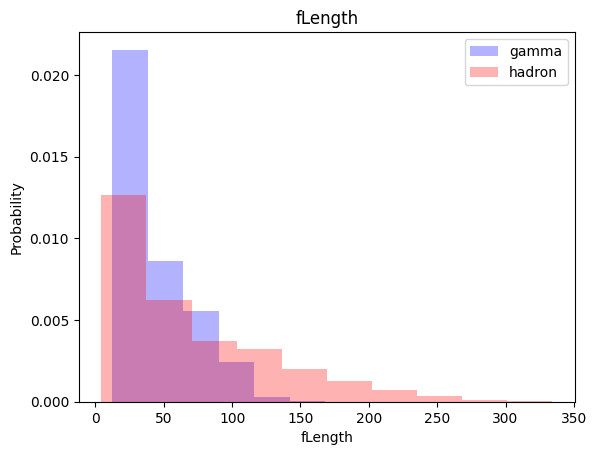

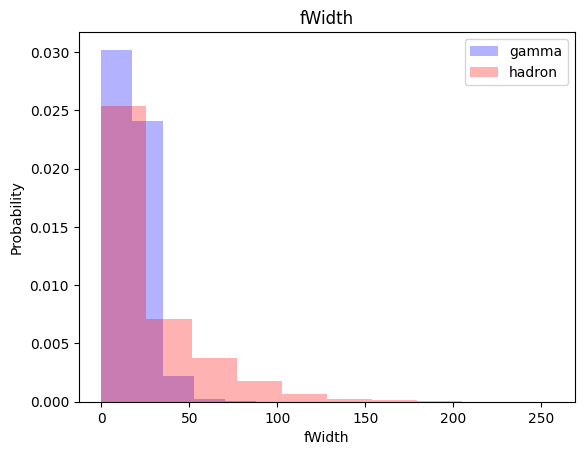

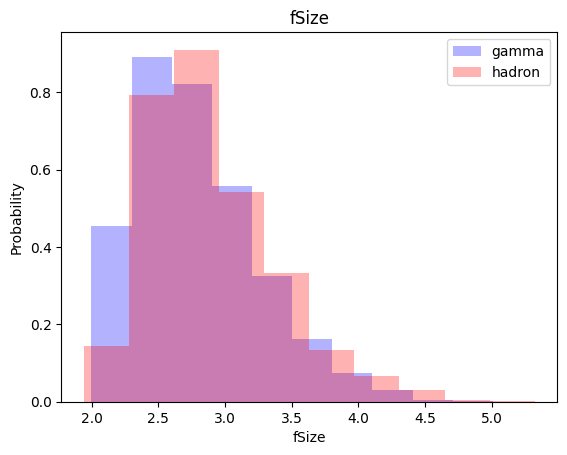

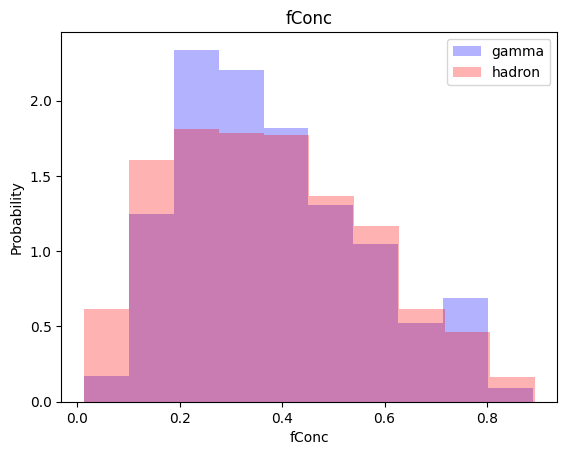

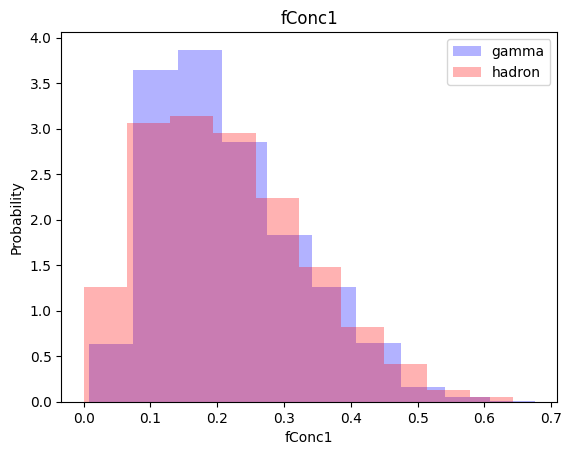

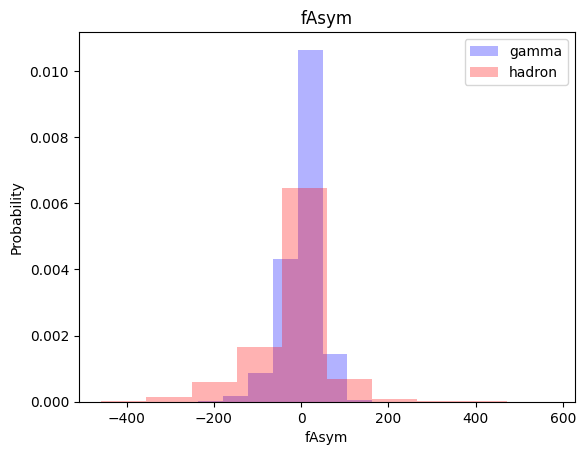

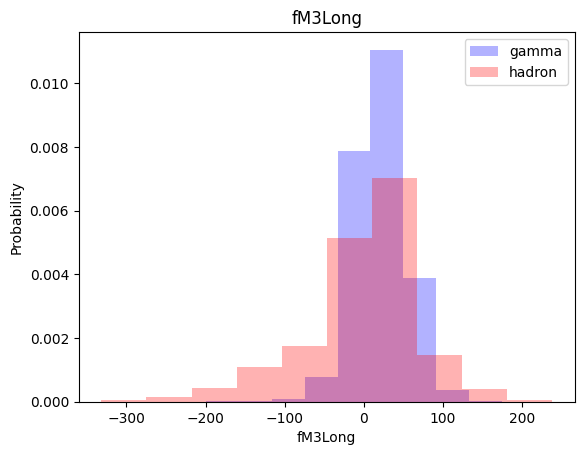

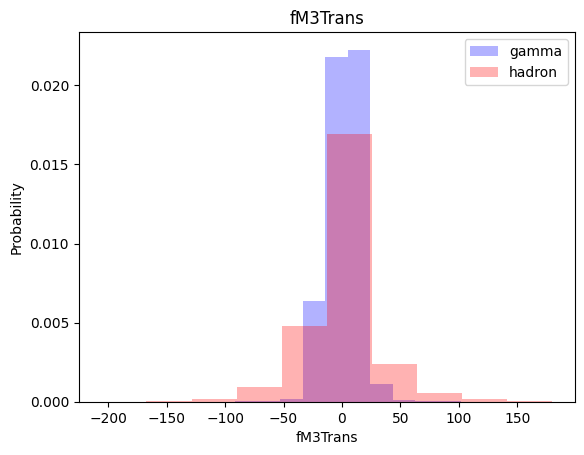

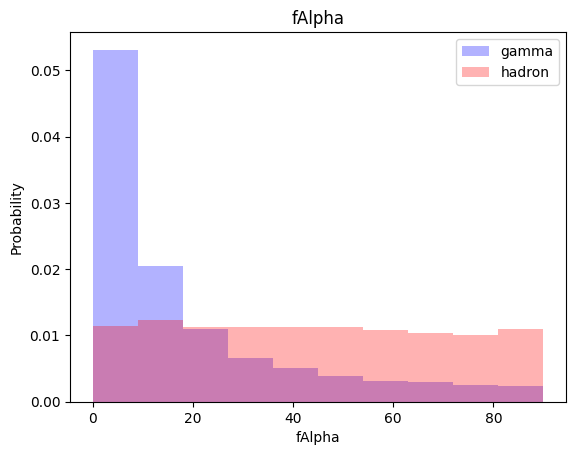

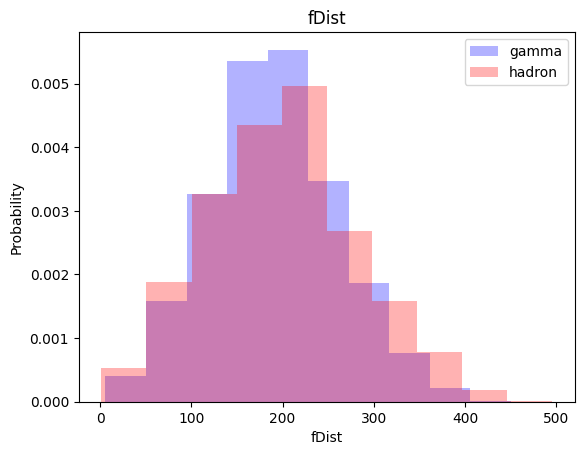

In [32]:
for label in cols[:-1]:
  plt.hist(df[df['Class']==1][label], color='blue', label='gamma', alpha=0.3, density=True)
  plt.hist(df[df['Class']==0][label], color='red', label='hadron', alpha=0.3, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, Validation, Τest datasets

In [42]:
# First, shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into training (60%), validation (20%), and test (20%) sets
train_end = int(0.6 * len(df))
valid_end = int(0.8 * len(df))

train = df[:train_end]
valid = df[train_end:valid_end]
test = df[valid_end:]

train = df[:train_end]
valid = df[train_end:valid_end]
test = df[valid_end:]

In [40]:
def scale_dataset(dataframe, oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros =  RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data,x,y

In [43]:
train, x_train, y_train= scale_dataset(train, oversample=True)
valid, x_valid, y_valid= scale_dataset(valid, oversample=False)   # WE DONT WANT BALANCE... THIS IS THE "REAL WORLD"
test, x_test, y_test= scale_dataset(test, oversample=False)

#  Models


## k-Nearest Neighbors (KNN)

In [47]:
from sklearn.neighbors import KNeighborsClassifier    # Because we Classifying !!
from sklearn.metrics import classification_report

In [66]:
Knn_model = KNeighborsClassifier(n_neighbors=5)   #Here we use 5 neighbor (5 nearest point)
Knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [67]:
y_pred = Knn_model.predict(x_test)

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1360
           1       0.86      0.87      0.86      2444

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.81      3804
weighted avg       0.82      0.82      0.82      3804



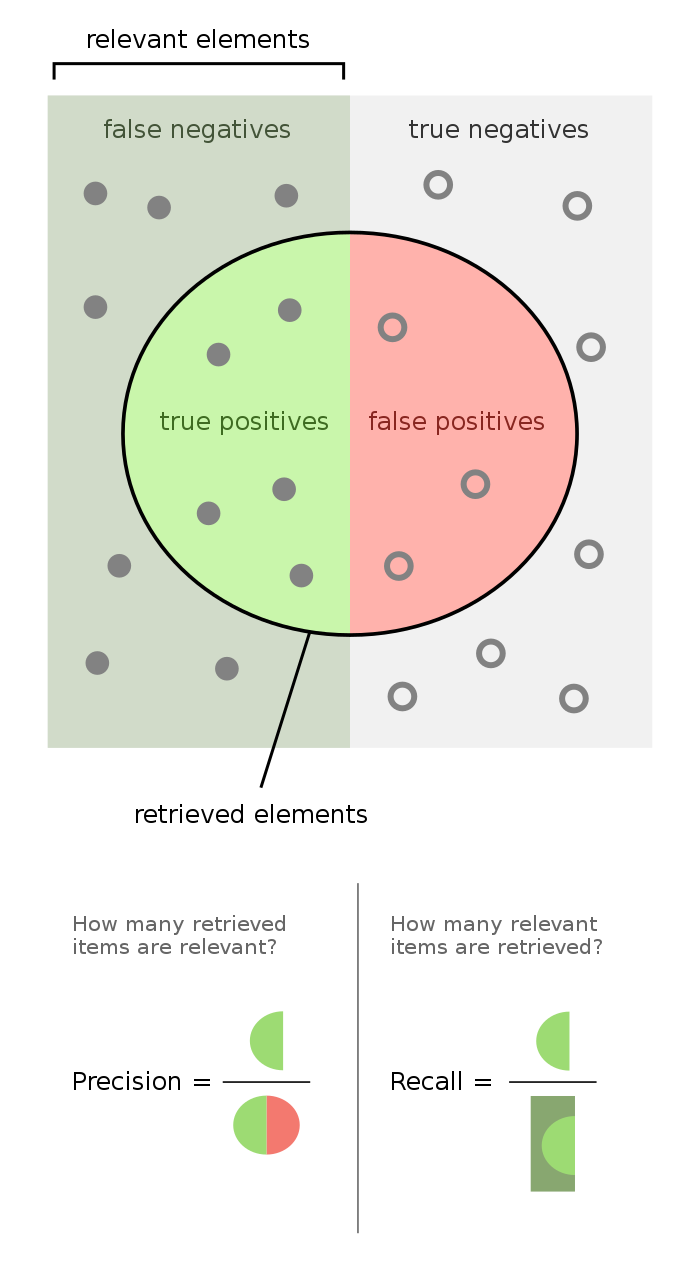